In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df = pd.read_csv('../Resource/address_dataset_kaggle.csv', index_col=0)

Visualisasi Untuk Pengumpulan Data

In [3]:
# Visualisasi Untuk Pengumpulan Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9841 entries, 0 to 9840
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Index                                                 9841 non-null   int64  
 1   Address                                               9841 non-null   object 
 2   FLAG                                                  9841 non-null   int64  
 3   Avg min between sent tnx                              9841 non-null   float64
 4   Avg min between received tnx                          9841 non-null   float64
 5   Time Diff between first and last (Mins)               9841 non-null   float64
 6   Sent tnx                                              9841 non-null   int64  
 7   Received Tnx                                          9841 non-null   int64  
 8   Number of Created Contracts                           9841 non-

Visualisasi Untuk Inisialisasi Dataset

In [4]:
# Visualisasi Untuk Inisialisasi Dataset

# Pilih kolom yang ingin ditampilkan, misalnya 'FLAG', 'kolom1', 'kolom2'
selected_columns = ['Index', 'Address','FLAG', 'Time Diff between first and last (Mins)', 'total transactions (including tnx to create contract', ' ERC20_most_rec_token_type', ' ERC20 most sent token type']

# Ambil 1 baris acak dengan FLAG == 1
flag_1 = df[df['FLAG'] == 1][selected_columns].sample(n=1)

# Ambil 1 baris acak dengan FLAG == 0
flag_0 = df[df['FLAG'] == 0][selected_columns].sample(n=1)

# Gabungkan kedua baris
result = pd.concat([flag_1, flag_0])

# Tampilkan dengan head()
result.head()

,Index,Address,FLAG,Time Diff between first and last (Mins),total transactions (including tnx to create contract,ERC20_most_rec_token_type,ERC20 most sent token type
8646,985,0x717d2041c516573a0e27f552cdb6c5c3ec7b4e09,1,491.85,6,Livepeer Token,
1520,1521,0x26df5b5ea7de6262906cb540701e0be4d1cb1e8e,0,689664.47,56,KickCoin,KickCoin


VISUALISASI UNTUK MISSING VALUE - ANALISIS DATASET

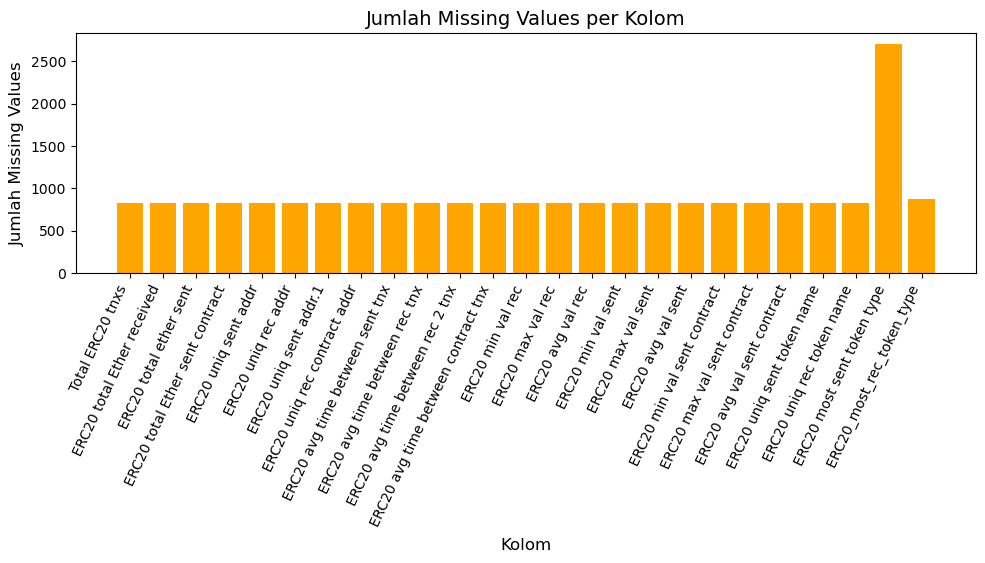

In [5]:
fig = plt.figure(figsize=(10, 12))
ax1 = fig.add_axes([0.1, 0.2, 0.9, 0.2])

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
ax1.bar(missing_values.index, missing_values.values, color='orange')
ax1.set_title('Jumlah Missing Values per Kolom', fontsize=14)
ax1.set_xlabel('Kolom', fontsize=12)
ax1.set_ylabel('Jumlah Missing Values', fontsize=12)


for label in ax1.get_xticklabels():
    label.set_rotation(65)
    label.set_ha('right')
    label.set_fontsize(10)

# plt.savefig("../picture/Analisis_Dataset/missing_value", dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)

VISUALISASI UNTUK DATA DUPLIKAT DAN UNIK - ANALISIS DATASET

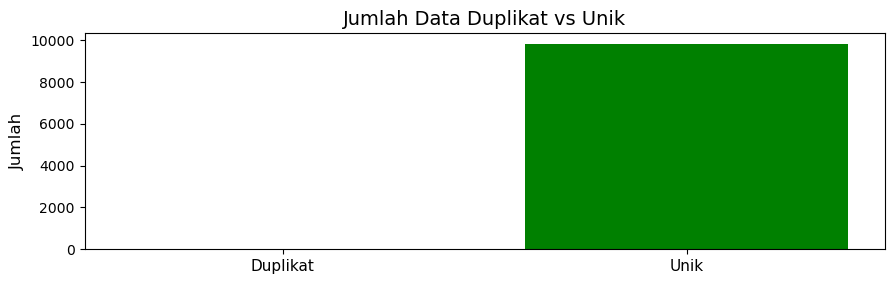

In [6]:
fig = plt.figure(figsize=(10, 12))
ax2 = fig.add_axes([0.1, 0.44, 0.8, 0.18])
total_duplicate = df.duplicated().sum()
ax2.bar(['Duplikat', 'Unik'], [total_duplicate, len(df) - total_duplicate], color=['red', 'green'])
ax2.set_title('Jumlah Data Duplikat vs Unik', fontsize=14)
ax2.set_ylabel('Jumlah', fontsize=12)
ax2.tick_params(axis='x', labelsize=11)

# plt.savefig("../picture/Analisis_Dataset/duplicate_unique", dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)

VISUALISASI UNTUK TIPE DATA - ANALISIS DATASET

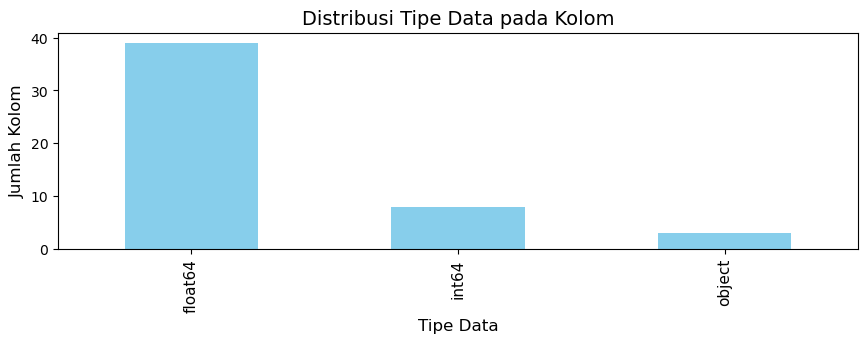

In [7]:
fig = plt.figure(figsize=(10, 12))
ax3 = fig.add_axes([0.1, 0.22, 0.8, 0.18])
data_types = df.dtypes.value_counts()
data_types.plot(kind='bar', color='skyblue', ax=ax3)
ax3.set_title('Distribusi Tipe Data pada Kolom', fontsize=14)
ax3.set_xlabel('Tipe Data', fontsize=12)
ax3.set_ylabel('Jumlah Kolom', fontsize=12)
ax3.tick_params(axis='x', labelsize=11)

# plt.savefig("../picture/Analisis_Dataset/type_data", dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)

DROP COLOM

In [8]:
df_before_drop = df.copy()


# 3. Data Cleaning
columns_drop = ['Index', 'Address']
df = df.drop(columns=columns_drop)

VISUALISASI UNTUK DROP COLOM - PREPROCESSING

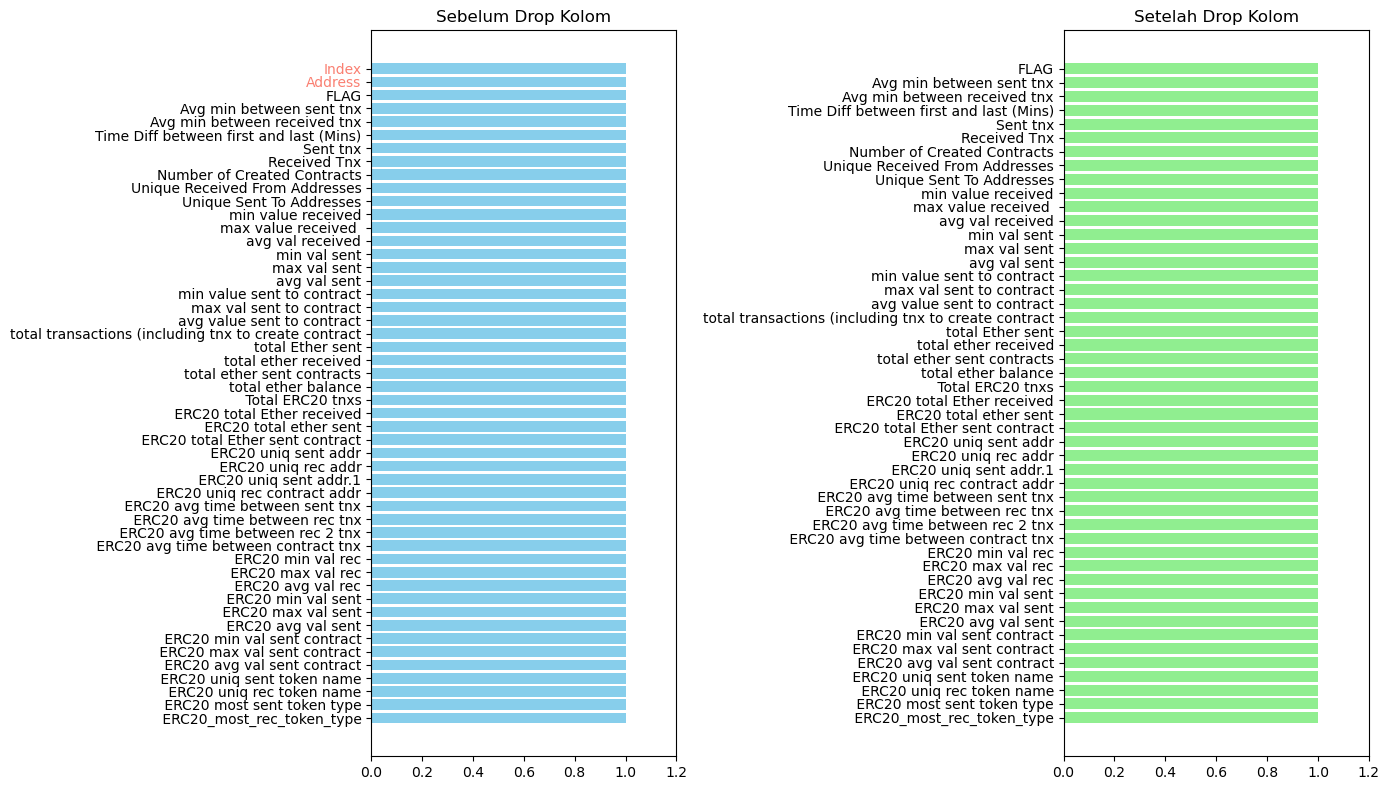

Gambar before-after drop kolom disimpan di: ../picture/preprocessing/before_after_drop_columns.png


In [ ]:
def visualisasi_drop_columns(df_before, df_after, columns_drop):
    before_cols = df_before.columns.tolist()
    after_cols = df_after.columns.tolist()

    fig, axes = plt.subplots(1, 2, figsize=(14, 8))

    # 1. Before
    axes[0].barh(range(len(before_cols)), [1]*len(before_cols), color='skyblue')
    axes[0].set_yticks(range(len(before_cols)))

    # Atur label sumbu Y dengan warna berbeda untuk kolom yang akan dihapus
    labels = axes[0].set_yticklabels(before_cols, fontsize=10)
    for label, col in zip(labels, before_cols):
        if col in columns_drop:
            label.set_color('salmon')  # Ubah warna font menjadi salmon untuk kolom yang dihapus

    axes[0].invert_yaxis()
    axes[0].set_title("Sebelum Drop Kolom", fontsize=12)
    axes[0].set_xlim(0, 1.2)

    # 2. After
    axes[1].barh(range(len(after_cols)), [1]*len(after_cols), color='lightgreen')
    axes[1].set_yticks(range(len(after_cols)))
    axes[1].set_yticklabels(after_cols, fontsize=10)
    axes[1].invert_yaxis()
    axes[1].set_title("Setelah Drop Kolom", fontsize=12)
    axes[1].set_xlim(0, 1.2)

    plt.tight_layout()
    # plt.savefig("../picture/preprocessing//before_after_drop_columns.png", dpi=300)
    plt.show()
    plt.close(fig)

    # print(f"Gambar before-after drop kolom disimpan di: ../picture/preprocessing/before_after_drop_columns.png")

visualisasi_drop_columns(
    df_before_drop,
    df,
    columns_drop
)

IMPUTASI KOLOM

In [12]:
df_before_imputasi = df.copy()

#4 Imputasi nilai

# untuk kolom numerik (mean)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Imputasi untuk kolom kategorikal (modus)
cat_cols = df.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

VISUALISASI UNTUK SEBELUM DAN SESUDAH IMPUTASI - PREPROCESSING

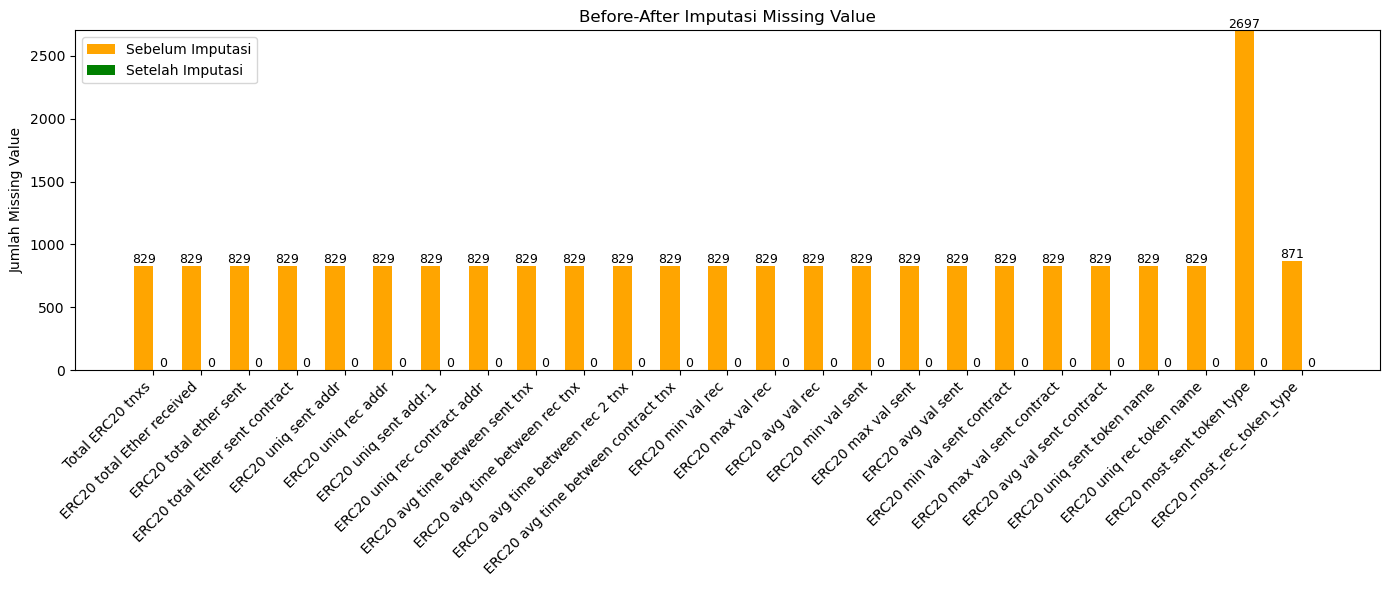

In [13]:
def visualisasi_imputasi(df_before, df_after):
    # Hitung jumlah missing values sebelum dan sesudah imputasi
    missing_before = df_before.isnull().sum()
    missing_after = df_after.isnull().sum()

    # Ambil hanya kolom yang sebelumnya punya missing value
    cols_with_missing = missing_before[missing_before > 0].index

    if len(cols_with_missing) == 0:
        print("Tidak ada missing value yang bisa divisualisasikan.")
        return

    # Filter data
    missing_before = missing_before[cols_with_missing]
    missing_after = missing_after[cols_with_missing]

    x = range(len(cols_with_missing))
    bar_width = 0.4

    plt.figure(figsize=(14, 6))
    bar1 = plt.bar(x, missing_before.values, width=bar_width, label='Sebelum Imputasi', color='orange')
    bar2 = plt.bar([i + bar_width for i in x], missing_after.values, width=bar_width, label='Setelah Imputasi', color='green')

    # Tambahkan label angka di atas bar
    for i, val in enumerate(missing_before.values):
        plt.text(i, val + 0.5, str(val), ha='center', va='bottom', fontsize=9)
    for i, val in enumerate(missing_after.values):
        # Naikin dikit walau 0 supaya tetap kelihatan
        plt.text(i + bar_width, val + 0.5, str(val), ha='center', va='bottom', fontsize=9)

    # Label & axis
    plt.xticks([i + bar_width / 2 for i in x], cols_with_missing, rotation=45, ha='right', fontsize=10)
    plt.ylabel("Jumlah Missing Value")
    plt.title("Before-After Imputasi Missing Value")
    plt.ylim(0, max(missing_before.max(), 5) + 5)  # Ini penting supaya bar 0 tetap terlihat
    plt.legend()
    plt.tight_layout()
    plt.show()
    # plt.savefig("../picture/preprocessing/before_after_imputasi.png", dpi=300)
    plt.close(fig)

    # print(f"Gambar before-after imputasi disimpan di: ../picture/preprocessing/before_after_imputasi.png")

# Visualisasi before-after imputasi
visualisasi_imputasi(
    df_before_imputasi,
    df
)

PEMISAHAN FITUR X DAN y

In [14]:
# 5. Split data terlebih dahulu
X = df.drop(columns=['FLAG'])
y = df['FLAG'].values.ravel()
X.columns = X.columns.str.replace(' ', '_')

# Hitung jumlah kelas 1 dan 0 pada y
kelas_1 = np.sum(y == 1)
kelas_0 = np.sum(y == 0)

print(f"Jumlah kelas 1 pada y: {kelas_1}")
print(f"Jumlah kelas 0 pada y: {kelas_0}")

Jumlah kelas 1 pada y: 2179
Jumlah kelas 0 pada y: 7662


VISUALISASI UNTUK PEMISAHAN FITUR X DAN y - PREPROCESSING

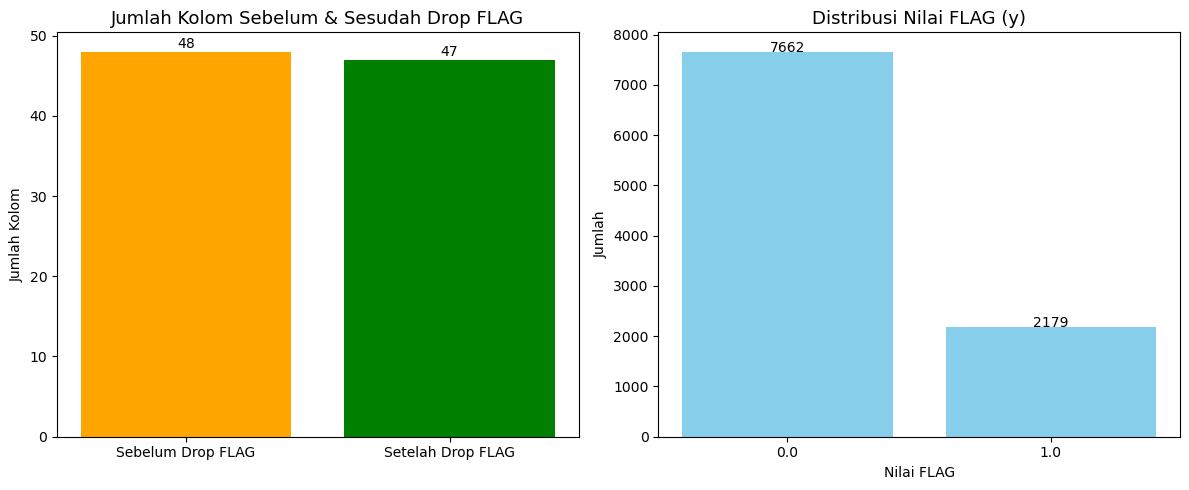

In [15]:
def visualisasi_drop_flag(df, X, y):
    # Data untuk plot jumlah kolom
    labels = ['Sebelum Drop FLAG', 'Setelah Drop FLAG']
    jumlah_kolom = [df.shape[1], X.shape[1]]

    # Buat figure
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Subplot 1: Jumlah Kolom Before vs After
    axs[0].bar(labels, jumlah_kolom, color=['orange', 'green'])
    axs[0].set_title('Jumlah Kolom Sebelum & Sesudah Drop FLAG', fontsize=13)
    axs[0].set_ylabel('Jumlah Kolom')
    for i, val in enumerate(jumlah_kolom):
        axs[0].text(i, val + 0.5, str(val), ha='center', fontsize=10)

    # Subplot 2: Distribusi Target (FLAG)
    nilai, count = pd.Series(y).value_counts().sort_index().index, pd.Series(y).value_counts().sort_index().values
    axs[1].bar([str(n) for n in nilai], count, color='skyblue')
    axs[1].set_title('Distribusi Nilai FLAG (y)', fontsize=13)
    axs[1].set_xlabel('Nilai FLAG')
    axs[1].set_ylabel('Jumlah')
    for i, val in enumerate(count):
        axs[1].text(i, val + 0.5, str(val), ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()
    # plt.savefig("../picture/preprocessing/before_after_drop_flag.png", dpi=300)
    plt.close(fig)

    # print(f"Visualisasi before-after drop FLAG berhasil disimpan di: ../picture/preprocessing/before_after_drop_flag.png")

visualisasi_drop_flag(
    df=df,        # Data awal (masih ada kolom 'FLAG')
    X=X,          # Data fitur setelah drop FLAG
    y=y          # Data target setelah diambil dari FLAG
)


KONVERSI KOLOM KATEGORIKAL MENJADI NUMERIK

In [16]:
X_before_encoding = X.copy()

#6 Encoding data kategorikal
# List kolom kategorikal
categorical_columns = ['_ERC20_most_sent_token_type', '_ERC20_most_rec_token_type']

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Iterasi dan transformasi tiap kolom
for col in categorical_columns:
    X[col] = le.fit_transform(X[col].astype(str))

VISUALISASI UNTUK KONVERSI KOLOM KATEGORIKAL MENJADI NUMERIK - FEATURE ENGINEERING

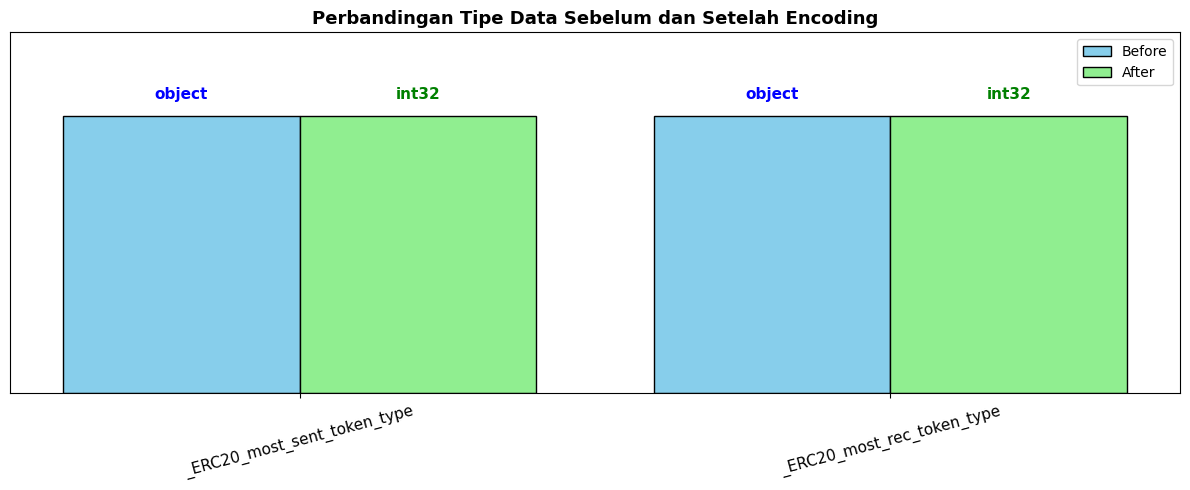

In [17]:
def visualisasi_tipe_data_encoding(X_before, X_after, categorical_columns):
    before_types = X_before[categorical_columns].dtypes.astype(str)
    after_types = X_after[categorical_columns].dtypes.astype(str)

    fig, ax = plt.subplots(figsize=(12, 5))

    x = range(len(categorical_columns))
    bar_width = 0.4

    # Bar sebelum dan sesudah
    bars1 = ax.bar([i - bar_width/2 for i in x], [1]*len(x), width=bar_width, label='Before', color='skyblue', edgecolor='black')
    bars2 = ax.bar([i + bar_width/2 for i in x], [1]*len(x), width=bar_width, label='After', color='lightgreen', edgecolor='black')

    # Tambahkan label tipe data di atas bar
    for i, col in enumerate(categorical_columns):
        ax.text(i - bar_width/2, 1.05, before_types[col], ha='center', va='bottom', fontsize=11, color='blue', fontweight='bold')
        ax.text(i + bar_width/2, 1.05, after_types[col], ha='center', va='bottom', fontsize=11, color='green', fontweight='bold')

    ax.set_xticks(x)
    ax.set_xticklabels(categorical_columns, rotation=15, fontsize=11)
    ax.set_yticks([])
    ax.set_ylim(0, 1.3)
    ax.set_title("Perbandingan Tipe Data Sebelum dan Setelah Encoding", fontsize=13, fontweight='bold')
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()
    # plt.savefig("../picture/Feature_Engineering/encoding_datatype_change.png", dpi=300)
    plt.close(fig)
    # print(f"✅ Visualisasi perbandingan tipe data disimpan di: ../picture/Feature_Engineering/encoding_datatype_change.png")

visualisasi_tipe_data_encoding(
    X_before=X_before_encoding,
    X_after=X,
    categorical_columns=categorical_columns
)


TRANSFORMASI LOGARITMIK

In [18]:
# num_cols_in_X = X.select_dtypes(include=['float64', 'int64']).columns
# Tangani nilai <= 0 agar tidak error di log (gunakan nilai kecil)
X_safe = X.copy()
X_safe = X_safe.apply(lambda col: col.apply(lambda x: x if x > 0 else 0.001))

# Log transformasi pada seluruh kolom numerik
log_transformer = FunctionTransformer(np.log1p, validate=True)
X_log = log_transformer.fit_transform(X_safe)

# Membuat DataFrame setelah log transformasi
X_log = pd.DataFrame(X_log, columns=X_safe.columns, index=X_safe.index)


VISUALISASI UNTUK TRANSFORMASI LOGARITMIK - FEATURE ENGINEERING

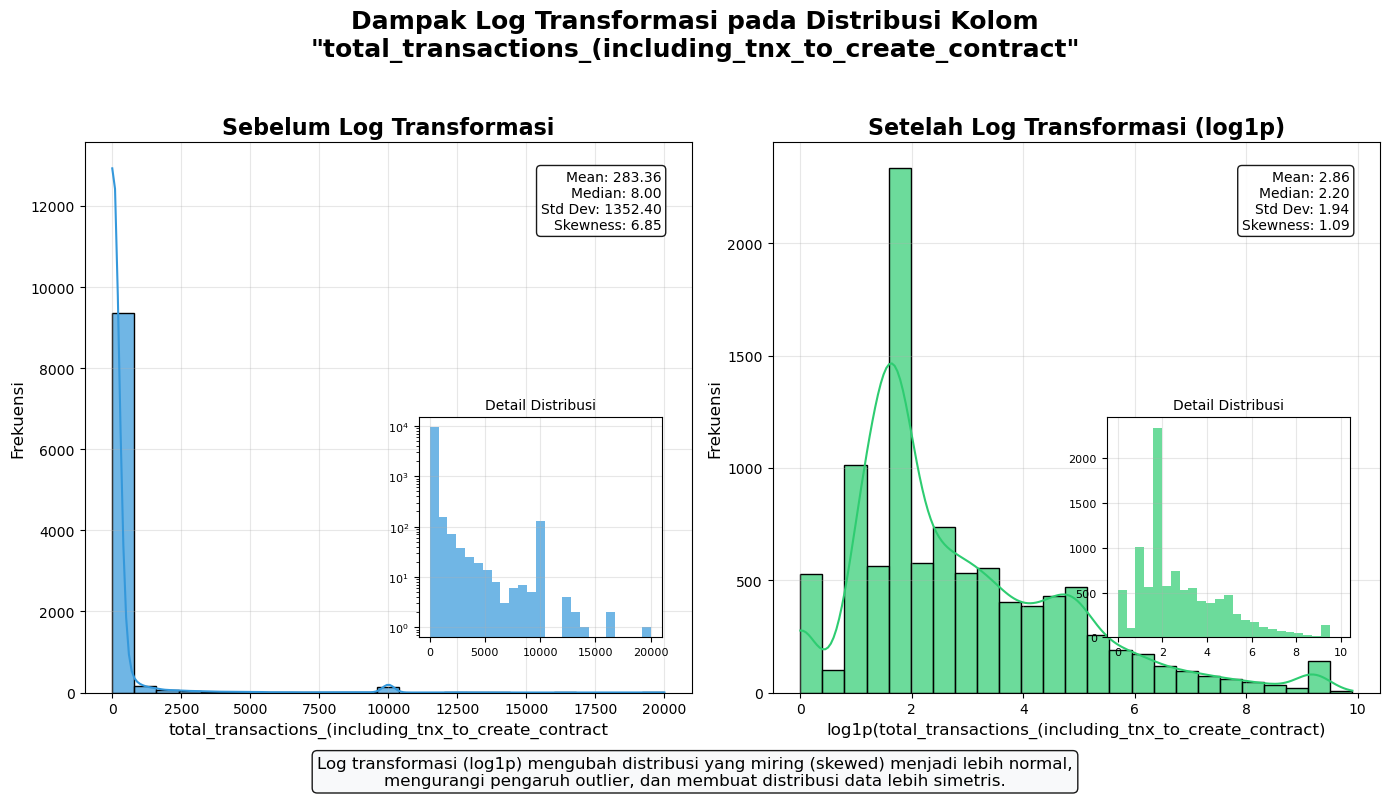

In [19]:
# Nama kolom target
kolom = 'total_transactions_(including_tnx_to_create_contract'

# Buat figure dengan layout yang baik
plt.figure(figsize=(14, 8))
gs = GridSpec(1, 2)

# Warna untuk visualisasi
before_color = '#3498db'  # biru
after_color = '#2ecc71'   # hijau

# Plot histogram untuk data sebelum transformasi
ax1 = plt.subplot(gs[0, 0])
sns.histplot(X_safe[kolom], kde=True, color=before_color, ax=ax1, bins=25, alpha=0.7)
ax1.set_title('Sebelum Log Transformasi', fontsize=16, fontweight='bold')
ax1.set_xlabel(f'{kolom}', fontsize=12)
ax1.set_ylabel('Frekuensi', fontsize=12)
ax1.grid(True, alpha=0.3)

# Tambahkan statistik pada plot
stats_before = f"Mean: {X_safe[kolom].mean():.2f}\nMedian: {X_safe[kolom].median():.2f}\nStd Dev: {X_safe[kolom].std():.2f}\nSkewness: {X_safe[kolom].skew():.2f}"
ax1.text(0.95, 0.95, stats_before, transform=ax1.transAxes,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# Plot histogram untuk data setelah transformasi
ax2 = plt.subplot(gs[0, 1])
sns.histplot(X_log[kolom], kde=True, color=after_color, ax=ax2, bins=25, alpha=0.7)
ax2.set_title('Setelah Log Transformasi (log1p)', fontsize=16, fontweight='bold')
ax2.set_xlabel(f'log1p({kolom})', fontsize=12)
ax2.set_ylabel('Frekuensi', fontsize=12)
ax2.grid(True, alpha=0.3)

# Tambahkan statistik pada plot
stats_after = f"Mean: {X_log[kolom].mean():.2f}\nMedian: {X_log[kolom].median():.2f}\nStd Dev: {X_log[kolom].std():.2f}\nSkewness: {X_log[kolom].skew():.2f}"
ax2.text(0.95, 0.95, stats_after, transform=ax2.transAxes,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# Tambahkan inset pada setiap plot untuk menunjukkan perubahan bentuk distribusi
# Inset untuk data sebelum transformasi
ax1_inset = ax1.inset_axes([0.55, 0.1, 0.4, 0.4])
ax1_inset.hist(X_safe[kolom], bins=25, color=before_color, alpha=0.7)
ax1_inset.set_title('Detail Distribusi', fontsize=10)
ax1_inset.set_yscale('log')  # Scale log untuk y axis inset
ax1_inset.tick_params(labelsize=8)
ax1_inset.grid(True, alpha=0.3)

# Inset untuk data setelah transformasi
ax2_inset = ax2.inset_axes([0.55, 0.1, 0.4, 0.4])
ax2_inset.hist(X_log[kolom], bins=25, color=after_color, alpha=0.7)
ax2_inset.set_title('Detail Distribusi', fontsize=10)
ax2_inset.tick_params(labelsize=8)
ax2_inset.grid(True, alpha=0.3)

# Judul keseluruhan
plt.suptitle(f'Dampak Log Transformasi pada Distribusi Kolom\n"{kolom}"',
             fontsize=18, fontweight='bold', y=0.98)

# Anotasi menjelaskan pengaruh transformasi log
transform_explanation = (
    "Log transformasi (log1p) mengubah distribusi yang miring (skewed) menjadi lebih normal,\n"
    "mengurangi pengaruh outlier, dan membuat distribusi data lebih simetris."
)
plt.figtext(0.5, 0.01, transform_explanation, ha='center', fontsize=12,
            bbox=dict(boxstyle='round', facecolor='#f8f9fa', alpha=0.9))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Sesuaikan layout
plt.show()

FEATURE SELECTION

In [20]:
X_final = X_log  # Data yang sudah di-log transform
model = GradientBoostingClassifier(random_state=42)

# Langkah 1: Evaluasi hingga 10 fitur dan simpan fitur yang dipilih
n_features_range = range(1, 11)
cv_scores = []
selected_features_dict = {}  # Untuk menyimpan fitur yang dipilih untuk setiap n

for n in n_features_range:
    sfs = SequentialFeatureSelector(
        estimator=model,
        n_features_to_select=n,
        direction='forward',
        scoring='f1',
        cv=5,
        n_jobs=-1
    )
    sfs.fit(X_final, y)
    selected_features = X_final.columns[sfs.get_support()].tolist()
    selected_features_dict[n] = selected_features
    X_selected = X_final[selected_features]

    score = cross_val_score(model, X_selected, y, cv=5, scoring='f1').mean()
    cv_scores.append(score)
    print(f"Jumlah fitur: {n}, F1-Score: {score:.4f}")

Jumlah fitur: 1, F1-Score: 0.8779
Jumlah fitur: 2, F1-Score: 0.9623
Jumlah fitur: 3, F1-Score: 0.9713
Jumlah fitur: 4, F1-Score: 0.9798
Jumlah fitur: 5, F1-Score: 0.9821
Jumlah fitur: 6, F1-Score: 0.9828
Jumlah fitur: 7, F1-Score: 0.9832
Jumlah fitur: 8, F1-Score: 0.9837
Jumlah fitur: 9, F1-Score: 0.9847
Jumlah fitur: 10, F1-Score: 0.9847


VISUALISASI JUMLAH FITUR YANG OPTIMAL

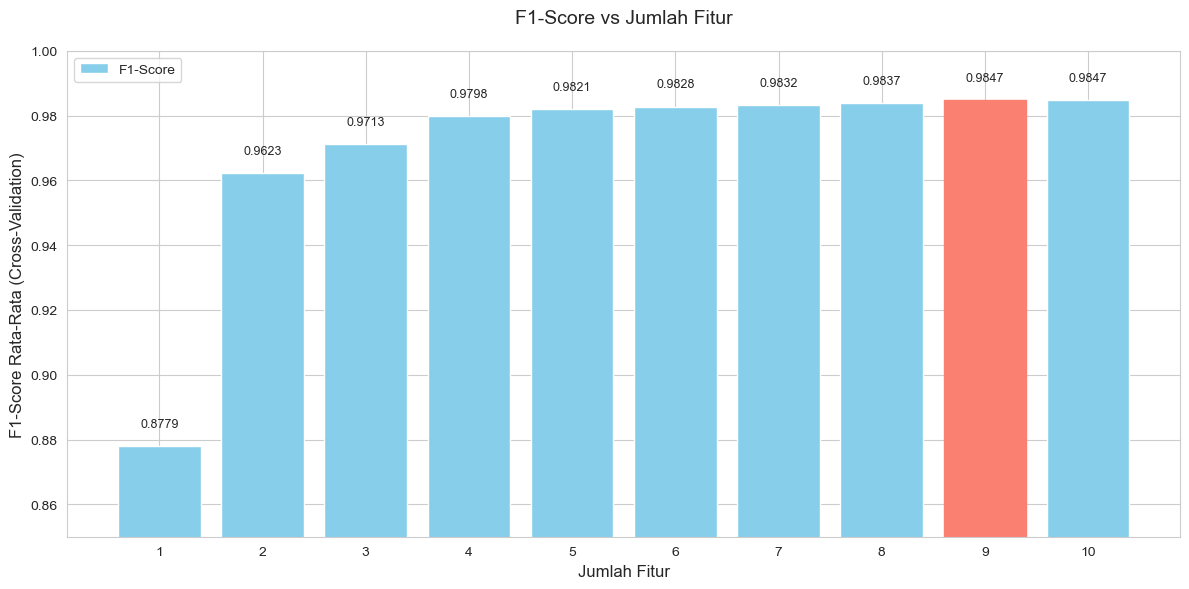

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
bars = plt.bar(n_features_range, cv_scores, color='skyblue', label='F1-Score')

# Highlight bar untuk 9 fitur
bars[8].set_color('salmon')

# Tambahkan anotasi nilai F1-score
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.4f}',
             ha='center', va='bottom', fontsize=9)

plt.xlabel('Jumlah Fitur', fontsize=12)
plt.ylabel('F1-Score Rata-Rata (Cross-Validation)', fontsize=12)
plt.title('F1-Score vs Jumlah Fitur', fontsize=14, pad=20)
plt.xticks(list(n_features_range))
plt.ylim(0.85, 1.0)
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
# Langkah 2: Gunakan fitur yang sudah dipilih untuk n=9
optimal_n = 9
selected_features = selected_features_dict[optimal_n]

print("Fitur yang dipilih (9 fitur terbaik):")
for feature in selected_features:
    print(f"- {feature}")

# Hitung cv_score untuk 9 fitur terpilih
X_selected = X_final[selected_features]
final_cv_score = cross_val_score(model, X_selected, y, cv=5, scoring='f1').mean()
print(f"F1-Score untuk 9 fitur terpilih: {final_cv_score:.4f}")

# Hitung feature importance untuk 9 fitur terpilih
model.fit(X_selected, y)
feature_importance = pd.Series(model.feature_importances_, index=selected_features)

print("\nFeature Importance untuk 9 fitur terpilih:")
for feature, importance in feature_importance.items():
    print(f"{feature}: {importance:.6f}")

Fitur yang dipilih (9 fitur terbaik):
- Time_Diff_between_first_and_last_(Mins)
- Unique_Received_From_Addresses
- Unique_Sent_To_Addresses
- total_transactions_(including_tnx_to_create_contract
- _ERC20_total_Ether_received
- _ERC20_uniq_rec_contract_addr
- _ERC20_uniq_sent_token_name
- _ERC20_most_sent_token_type
- _ERC20_most_rec_token_type
F1-Score untuk 9 fitur terpilih: 0.9847

Feature Importance untuk 9 fitur terpilih:
Time_Diff_between_first_and_last_(Mins): 0.018270
Unique_Received_From_Addresses: 0.004012
Unique_Sent_To_Addresses: 0.000200
total_transactions_(including_tnx_to_create_contract: 0.009147
_ERC20_total_Ether_received: 0.426020
_ERC20_uniq_rec_contract_addr: 0.000156
_ERC20_uniq_sent_token_name: 0.020724
_ERC20_most_sent_token_type: 0.511969
_ERC20_most_rec_token_type: 0.009502


VISUALISASI UNTUK 9 FITUR TERPILIH

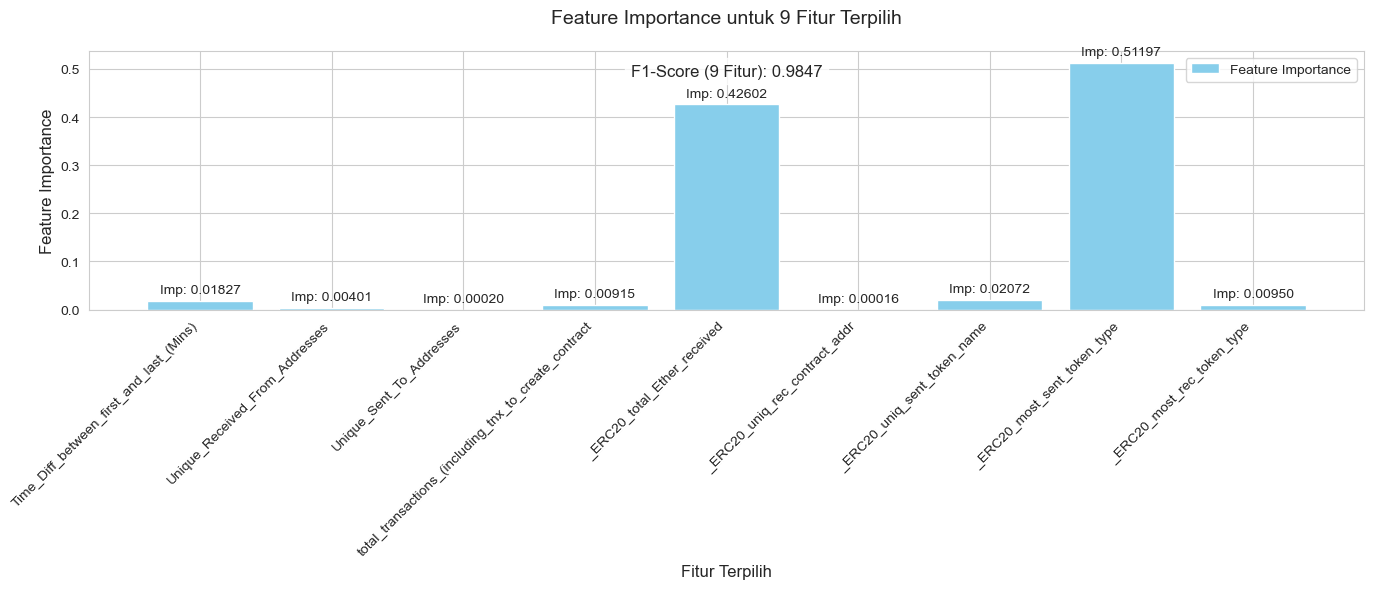

In [23]:
# Visualisasi feature importance untuk 9 fitur terpilih (Gambar 4.12)
plt.figure(figsize=(14, 6))
bars = plt.bar(selected_features, feature_importance, color='skyblue', label='Feature Importance')

# Tambahkan nilai feature importance di atas setiap bar
for bar, importance in zip(bars, feature_importance):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'Imp: {importance:.5f}',
             ha='center', va='bottom', fontsize=10)

# Tambahkan F1-Score sebagai anotasi
plt.text(0.5, 0.95, f'F1-Score (9 Fitur): {final_cv_score:.4f}',
         ha='center', va='top', fontsize=12, transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.xticks(rotation=45, ha='right')
plt.xlabel('Fitur Terpilih', fontsize=12)
plt.ylabel('Feature Importance', fontsize=12)
plt.title('Feature Importance untuk 9 Fitur Terpilih', fontsize=14, pad=20)
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
# Langkah 4: Filter fitur dengan feature importance < 0.001
threshold = 0.001
selected_features_filtered = feature_importance[feature_importance >= threshold].index
X_selected_filtered = X_final[selected_features_filtered]

print(f"\nFitur setelah filter (importance >= {threshold}):")
for feature in selected_features_filtered:
    print(f"- {feature}")

# Hitung ulang F1-score untuk fitur yang tersisa
final_cv_score_filtered = cross_val_score(model, X_selected_filtered, y, cv=5, scoring='f1').mean()
print(f"F1-Score setelah filter (importance >= {threshold}): {final_cv_score_filtered:.4f}")


Fitur setelah filter (importance >= 0.001):
- Time_Diff_between_first_and_last_(Mins)
- Unique_Received_From_Addresses
- total_transactions_(including_tnx_to_create_contract
- _ERC20_total_Ether_received
- _ERC20_uniq_sent_token_name
- _ERC20_most_sent_token_type
- _ERC20_most_rec_token_type
F1-Score setelah filter (importance >= 0.001): 0.9828


VISUALISASI UNTUK HASIL FITUR YANG MELEWATI FILTERING

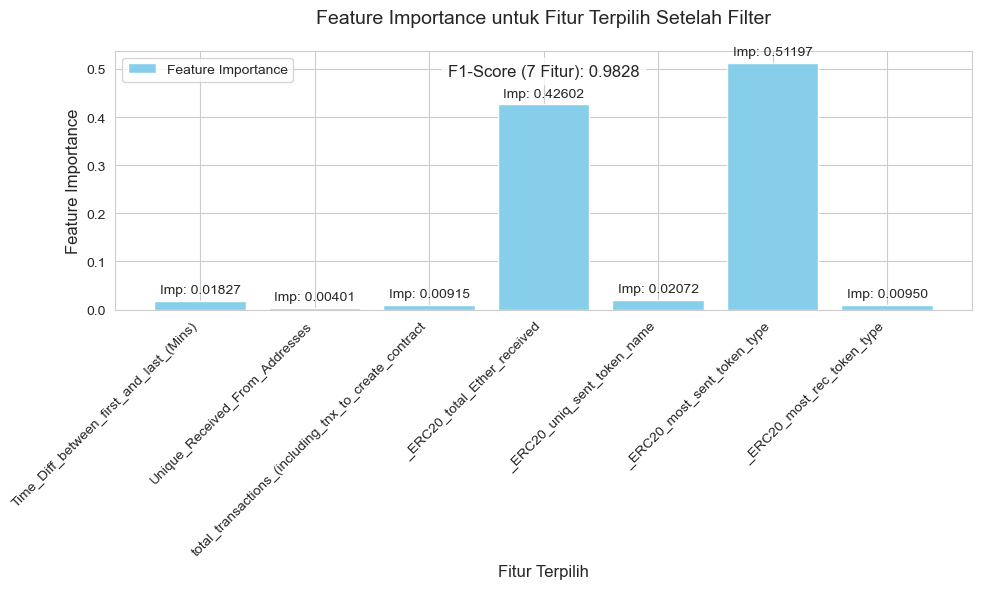

In [25]:
# Visualisasi feature importance untuk fitur yang tersisa setelah filtering (Gambar 4.13)
feature_importance_filtered = feature_importance[feature_importance >= threshold]

plt.figure(figsize=(10, 6))
bars = plt.bar(selected_features_filtered, feature_importance_filtered, color='skyblue', label='Feature Importance')

# Tambahkan nilai feature importance di atas setiap bar
for bar, importance in zip(bars, feature_importance_filtered):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'Imp: {importance:.5f}',
             ha='center', va='bottom', fontsize=10)

# Tambahkan F1-Score sebagai anotasi
plt.text(0.5, 0.95, f'F1-Score ({len(selected_features_filtered)} Fitur): {final_cv_score_filtered:.4f}',
         ha='center', va='top', fontsize=12, transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.xticks(rotation=45, ha='right')
plt.xlabel('Fitur Terpilih', fontsize=12)
plt.ylabel('Feature Importance', fontsize=12)
plt.title('Feature Importance untuk Fitur Terpilih Setelah Filter', fontsize=14, pad=20)
plt.legend()
plt.tight_layout()
plt.show()

SPLITING DATA

In [28]:
X_result = X_selected_filtered

# Bagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_result, y, test_size=0.2, random_state=42)

# Hitung jumlah sampel untuk data latih dan uji
total_samples = len(y)
train_samples = len(y_train)
test_samples = len(y_test)

# Hitung persentase pembagian
train_percent = (train_samples / total_samples) * 100
test_percent = (test_samples / total_samples) * 100

# Hitung jumlah sampel per kelas untuk data latih (y_train)
train_class_counts = pd.Series(y_train).value_counts()
train_flag_0_count = train_class_counts[0] if 0 in train_class_counts else 0
train_flag_1_count = train_class_counts[1] if 1 in train_class_counts else 0

# Hitung jumlah sampel per kelas untuk data uji (y_test)
test_class_counts = pd.Series(y_test).value_counts()
test_flag_0_count = test_class_counts[0] if 0 in test_class_counts else 0
test_flag_1_count = test_class_counts[1] if 1 in test_class_counts else 0

VISUALISASI SPLITING DATA

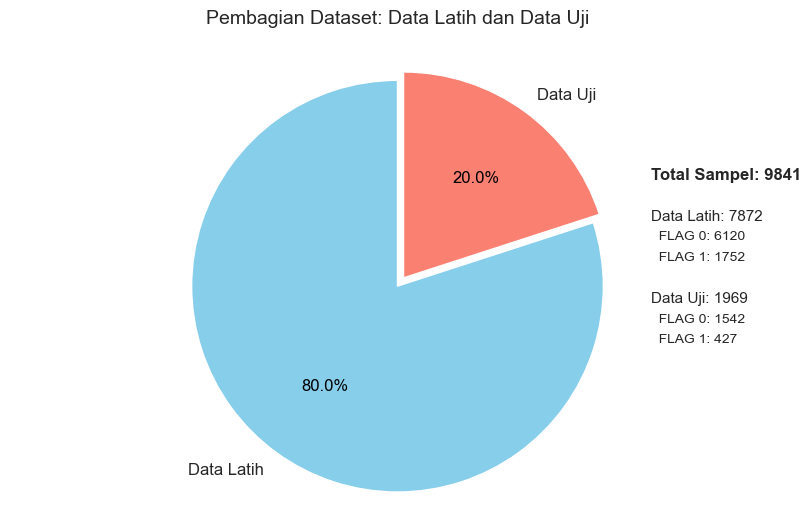

In [33]:
# Buat figure dengan subplot untuk memberikan ruang bagi teks di sisi kanan
fig, ax = plt.subplots(figsize=(10, 6))

# Buat pie chart untuk pembagian data latih dan uji
labels = ['Data Latih', 'Data Uji']
sizes = [train_samples, test_samples]
colors = ['skyblue', 'salmon']
explode = (0.05, 0)  # Sedikit "memisahkan" slice Data Latih

wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})

# Atur posisi label "Data Latih" dan "Data Uji" di luar pie chart dengan garis penghubung
for text in texts:
    text.set_fontsize(12)

# Atur ukuran dan warna persentase di dalam pie chart
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('black')

# Tambahkan teks di luar pie chart (di sebelah kanan)
plt.text(1.2, 0.5, f'Total Sampel: {total_samples}', fontsize=12, ha='left', va='center', weight='bold')
plt.text(1.2, 0.3, f'Data Latih: {train_samples}', fontsize=11, ha='left', va='center')
plt.text(1.2, 0.2, f'  FLAG 0: {train_flag_0_count}', fontsize=10, ha='left', va='center')
plt.text(1.2, 0.1, f'  FLAG 1: {train_flag_1_count}', fontsize=10, ha='left', va='center')
plt.text(1.2, -0.1, f'Data Uji: {test_samples}', fontsize=11, ha='left', va='center')
plt.text(1.2, -0.2, f'  FLAG 0: {test_flag_0_count}', fontsize=10, ha='left', va='center')
plt.text(1.2, -0.3, f'  FLAG 1: {test_flag_1_count}', fontsize=10, ha='left', va='center')

# Atur batas plot untuk memastikan teks tidak terpotong
plt.xlim(-1.5, 2.5)
plt.ylim(-1.5, 1.5)

# Judul
plt.title('Pembagian Dataset: Data Latih dan Data Uji', fontsize=14, pad=20)
ax.axis('equal')  # Agar pie chart berbentuk lingkaran
plt.show()

OVERSAMPLING

In [34]:
# Terapkan SMOTE pada data latih
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Cek distribusi kelas setelah SMOTE
train_smote_class_counts = pd.Series(y_train_smote).value_counts()
print("Distribusi kelas setelah SMOTE pada data latih:")
print(f"FLAG 0: {train_smote_class_counts[0] if 0 in train_smote_class_counts else 0}")
print(f"FLAG 1: {train_smote_class_counts[1] if 1 in train_smote_class_counts else 0}")

Distribusi kelas setelah SMOTE pada data latih:
FLAG 0: 6120
FLAG 1: 6120


VISUALISASI OVERSAMPLING

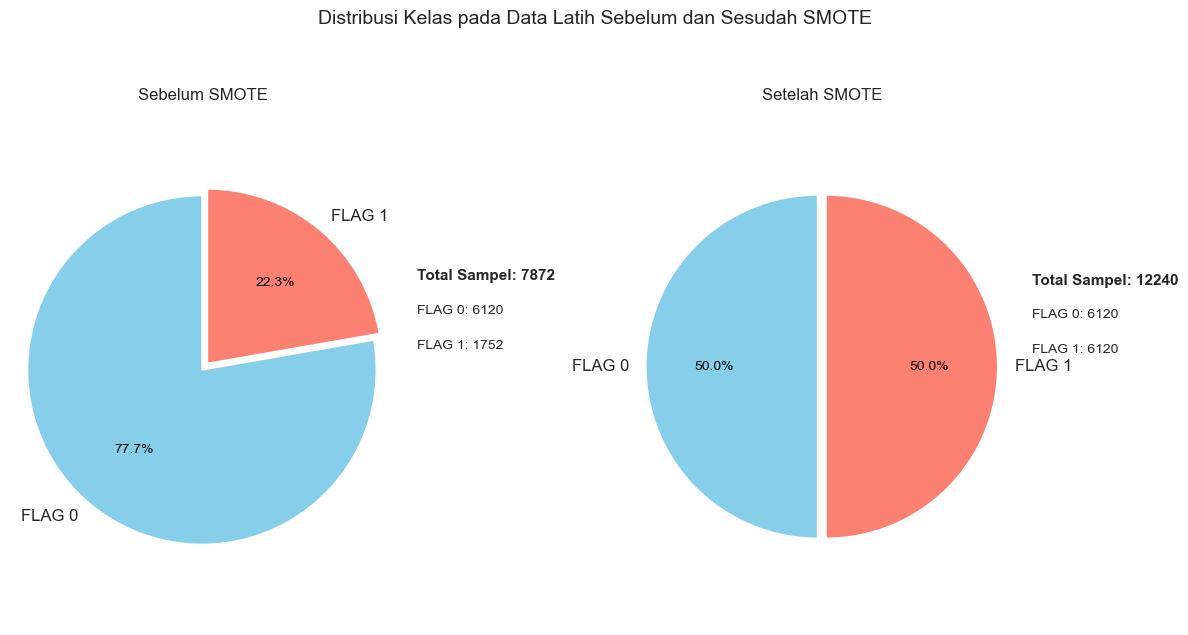

In [35]:
# Hitung distribusi kelas sebelum SMOTE (y_train)
total_train_samples = len(y_train)
train_class_counts = pd.Series(y_train).value_counts()
train_flag_0_count = train_class_counts[0] if 0 in train_class_counts else 0
train_flag_1_count = train_class_counts[1] if 1 in train_class_counts else 0

# Hitung distribusi kelas setelah SMOTE (y_train_smote)
total_train_smote_samples = len(y_train_smote)
train_smote_class_counts = pd.Series(y_train_smote).value_counts()
train_smote_flag_0_count = train_smote_class_counts[0] if 0 in train_smote_class_counts else 0
train_smote_flag_1_count = train_smote_class_counts[1] if 1 in train_smote_class_counts else 0

# Buat dua pie chart berdampingan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart untuk sebelum SMOTE
labels = ['FLAG 0', 'FLAG 1']
train_sizes = [train_flag_0_count, train_flag_1_count]
colors = ['skyblue', 'salmon']
explode = (0.05, 0)  # Sedikit "memisahkan" slice FLAG 0

wedges1, texts1, autotexts1 = ax1.pie(train_sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
ax1.set_title('Sebelum SMOTE', fontsize=12)

# Atur ukuran dan warna persentase
for autotext in autotexts1:
    autotext.set_fontsize(10)
    autotext.set_color('black')

# Tambahkan teks di luar pie chart (sebelah kanan)
ax1.text(1.2, 0.5, f'Total Sampel: {total_train_samples}', fontsize=11, ha='left', va='center', weight='bold')
ax1.text(1.2, 0.3, f'FLAG 0: {train_flag_0_count}', fontsize=10, ha='left', va='center')
ax1.text(1.2, 0.1, f'FLAG 1: {train_flag_1_count}', fontsize=10, ha='left', va='center')

# Pie chart untuk setelah SMOTE
train_smote_sizes = [train_smote_flag_0_count, train_smote_flag_1_count]
wedges2, texts2, autotexts2 = ax2.pie(train_smote_sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
ax2.set_title('Setelah SMOTE', fontsize=12)

# Atur ukuran dan warna persentase
for autotext in autotexts2:
    autotext.set_fontsize(10)
    autotext.set_color('black')

# Tambahkan teks di luar pie chart (sebelah kanan)
ax2.text(1.2, 0.5, f'Total Sampel: {total_train_smote_samples}', fontsize=11, ha='left', va='center', weight='bold')
ax2.text(1.2, 0.3, f'FLAG 0: {train_smote_flag_0_count}', fontsize=10, ha='left', va='center')
ax2.text(1.2, 0.1, f'FLAG 1: {train_smote_flag_1_count}', fontsize=10, ha='left', va='center')

# Atur batas plot untuk memastikan teks tidak terpotong
ax1.set_xlim(-1.5, 2.5)
ax1.set_ylim(-1.5, 1.5)
ax2.set_xlim(-1.5, 2.5)
ax2.set_ylim(-1.5, 1.5)

# Pastikan pie chart berbentuk lingkaran
ax1.axis('equal')
ax2.axis('equal')

plt.suptitle('Distribusi Kelas pada Data Latih Sebelum dan Sesudah SMOTE', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

VISUALISASI EXPORT DATA

In [37]:
# Total sampel untuk X_train_smote dan y_train_smote (setelah SMOTE)
total_x_train_smote = len(X_train_smote)
total_y_train_smote = len(y_train_smote)

# Total sampel untuk y_test (data target uji)
total_y_test = len(y_test)

# Total sampel untuk X_test (data fitur uji)
total_x_test = len(X_test)

# Cetak hasil
print("Total sampel X_train_smote:", total_x_train_smote)
print("Total sampel y_train_smote:", total_y_train_smote)
print("Total sampel y_test:", total_y_test)
print("Total sampel X_test:", total_x_test)

Total sampel X_train_smote: 12240
Total sampel y_train_smote: 12240
Total sampel y_test: 1969
Total sampel X_test: 1969


EXPORT DATA

In [38]:
# Simpan X_train_smote
X_train_smote.to_csv('../Data/fix/X_train_smote.csv', index=False)

# Simpan X_test
X_test.to_csv('../Data/fix/X_test.csv', index=False)

# Simpan y_train_smote sebagai array 1 dimensi
np.savetxt('../Data/fix/y_train_smote.csv', y_train_smote, delimiter=",", fmt='%d')

# Simpan y_test sebagai array 1 dimensi
np.savetxt('../Data/fix/y_test.csv', y_test, delimiter=",", fmt='%d')

# Cetak konfirmasi dengan shape
print("\nData telah di-export:")
print(f"X_train_smote shape: {X_train_smote.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train_smote shape: {y_train_smote.shape}")
print(f"y_test shape: {y_test.shape}")


Data telah di-export:
X_train_smote shape: (12240, 7)
X_test shape: (1969, 7)
y_train_smote shape: (12240,)
y_test shape: (1969,)
